# Neural Networks

Neural network is no mystery, it is just a function with powerful learning ability.

At this time, you don't need to care much details about its complicated structure.

In Julia, two deep learning packages are commonly used:
- `Flux.jl`:[Welcome · Flux](https://fluxml.ai/Flux.jl/stable/)
- `Lux.jl`:[LuxDL Docs](https://lux.csail.mit.edu/)

Here, we use `Flux.jl` as an example. More details can be seen in packages official documents.

## Multilayer neural network as a function

You only need to regard neural network as a function $f(x,p)$, $x$ input, $p$ parameters.

In [18]:
using Flux
dnn_model = Chain(Dense(1, 10, swish), Dense(10, 100,swish),Dense(100, 10, swish), Dense(10, 1))
# Remark: In Deep Learning, there is no one dimensional scalar but one dimensional vector 
dnn_model([1.0f0])

1-element Vector{Float32}:
 -0.026222914

In [19]:
dnn_model2 = Chain(Dense(2, 10, swish), Dense(10, 100,swish),Dense(100, 10, swish), Dense(10, 2))
# Remark: f0 here means we use Float32
dnn_model2([1.0f0,2.0f0])[1]

-0.0631779f0

Note here that we didn't set parameters for this deep learning architecture, however, it has an input. Why? 

The reason is that in `Flux.jl`, a DNN model has parameters pre defined. Sometimes, it is very inconvenient. Thus, we need to destructure the neural network, so that we can change the parameter of the neural network.

## IMPORTANT: destructure

In [20]:
parameter, structure=Flux.destructure(dnn_model2) # parameters and structures
newpara = parameter*0.1 .+ 0.3
# DNN with new parameters
f(x,p)=structure(p)(x)# x input, p parameter
println("DNN with new parameter:", f([1.0f0,2.0f0],newpara))

DNN with new parameter:Float32[252.98296, 267.97952]


## Using DNN to learn $\sin(x)$

In [21]:
using Flux
using Flux:train!,params
# 1. Gennerate Data
x = Array(-2π:0.01:2π)'
data = sin.(x)
#dnn_model = Chain(Dense(1, 1), x-> cos.(x))
#dnn_model = Chain(Dense(1, 128, relu), Dense(128, 1), x-> cos.(x))
dnn_model = Chain(Dense(1, 10, swish), Dense(10, 100,swish),Dense(100, 10, swish), Dense(10, 1))
# dnn_model = Chain(Dense(1, 32, relu), Dense(32, 1, tanh))


# 2. Define Loss Functions
loss2(a,b) = Flux.Losses.mae(dnn_model(x), data)

# Train the model
opt=ADAM(0.02)
println(loss2(x, data))
train!(loss2, Flux.params(dnn_model), [(x,data)], opt)
println(loss2(x, data))



for epoch in 1:5000
    train!(loss2, params(dnn_model), [(x,data)], opt)
    if epoch%500==0
    println(loss2(x, data))
    end
end

0.6206006473196265
0.8076050883814331


0.042609941217312285


0.057256383973707914


0.024635780372305693


0.018560637583169084


0.02550441934655159


0.014819088422155003


0.01778923841804284


0.02522242924525595


0.015124328227844758


0.035268936340052626


Data visulization

0.035268936340052626


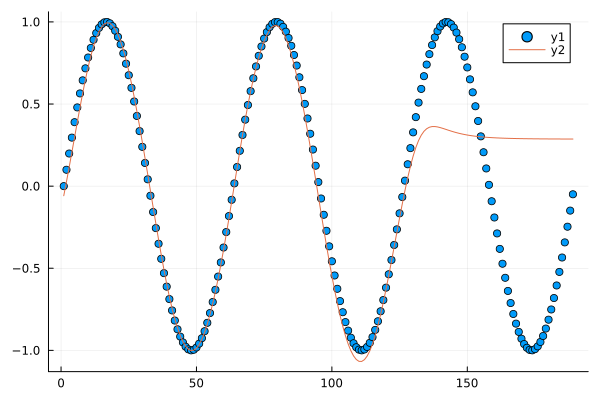

In [22]:
using Plots
println(loss2(x, data))
y = Array(-2π:0.1:4π)'
scatter(sin.(y)')
plot!(dnn_model(y)')


### Question: why this DNN learn the $\sin(x)$ data but  fails to predict $\sin(x)$? How to improve the performance?